# Jupyter Notebook: Parsing Excel file and Visualizing Data

In this notebook, we will load a Excel file, convert it to a pandas DataFrame, and then create visualizations using matplotlib.

In [44]:
pip install pandas matplotlib openpyxl


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Load Excel File

In [46]:
# Load the Excel file
file_path = "Marijuana_Sales_2014_To_Date_Report_V2.xlsx"
df = pd.read_excel(file_path, usecols=["Month", "Year", "Total Medical Marijuana Sales", 
                                       "Total Retail Marijuana Sales", "Total Marijuana Sales"])


# Optional: Display the first few rows to see the structure of the data
df.head(15)

,Month,Year,Total Medical Marijuana Sales,Total Retail Marijuana Sales,Total Marijuana Sales
0,July,2024,13640705.1,108909609.0,1.225503e+08
1,June,2024,13961464.47,99802616.0,1.137641e+08
2,May,2024,14771262.58,98403225.0,1.131745e+08
3,April,2024,14659595.2,105513139.0,1.201727e+08
4,March,2024,15116515.03,111514395.0,1.266309e+08
5,February,2024,13833825.44,100571530.0,1.144054e+08
6,January,2024,15277966.24,100107314.0,1.153853e+08
7,December,2023,14701439.92,101101951.0,1.158034e+08
8,November,2023,14521352.17,95823249.0,1.103446e+08
9,October,2023,14797460.25,107875657.0,1.226731e+08


## Step 2: Convert Month and Year Columns to a Datetime Object

In [47]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')
df.set_index('Date', inplace=True)  # Set the date as the index

# Optional: Preview the cleaned DataFrame
df.head(15)

,Month,Year,Total Medical Marijuana Sales,Total Retail Marijuana Sales,Total Marijuana Sales
Date,,,,,
2024-07-01,July,2024,13640705.1,108909609.0,1.225503e+08
2024-06-01,June,2024,13961464.47,99802616.0,1.137641e+08
2024-05-01,May,2024,14771262.58,98403225.0,1.131745e+08
2024-04-01,April,2024,14659595.2,105513139.0,1.201727e+08
2024-03-01,March,2024,15116515.03,111514395.0,1.266309e+08
2024-02-01,February,2024,13833825.44,100571530.0,1.144054e+08
2024-01-01,January,2024,15277966.24,100107314.0,1.153853e+08
2023-12-01,December,2023,14701439.92,101101951.0,1.158034e+08
2023-11-01,November,2023,14521352.17,95823249.0,1.103446e+08


## Step 3: Plot Line Graphs by Month

In [48]:
# Inspect the columns to find non-numeric values
df[['Total Medical Marijuana Sales', 'Total Retail Marijuana Sales', 'Total Marijuana Sales']].head(10)


,Total Medical Marijuana Sales,Total Retail Marijuana Sales,Total Marijuana Sales
Date,,,
2024-07-01,13640705.1,108909609.0,1.225503e+08
2024-06-01,13961464.47,99802616.0,1.137641e+08
2024-05-01,14771262.58,98403225.0,1.131745e+08
2024-04-01,14659595.2,105513139.0,1.201727e+08
2024-03-01,15116515.03,111514395.0,1.266309e+08
2024-02-01,13833825.44,100571530.0,1.144054e+08
2024-01-01,15277966.24,100107314.0,1.153853e+08
2023-12-01,14701439.92,101101951.0,1.158034e+08
2023-11-01,14521352.17,95823249.0,1.103446e+08


In [49]:
# Convert the columns to numeric, forcing non-numeric values to NaN
df['Total Medical Marijuana Sales'] = pd.to_numeric(df['Total Medical Marijuana Sales'], errors='coerce')
df['Total Retail Marijuana Sales'] = pd.to_numeric(df['Total Retail Marijuana Sales'], errors='coerce')
df['Total Marijuana Sales'] = pd.to_numeric(df['Total Marijuana Sales'], errors='coerce')

# Optionally drop rows with NaN values
df.dropna(subset=['Total Medical Marijuana Sales', 'Total Retail Marijuana Sales', 'Total Marijuana Sales'], inplace=True)


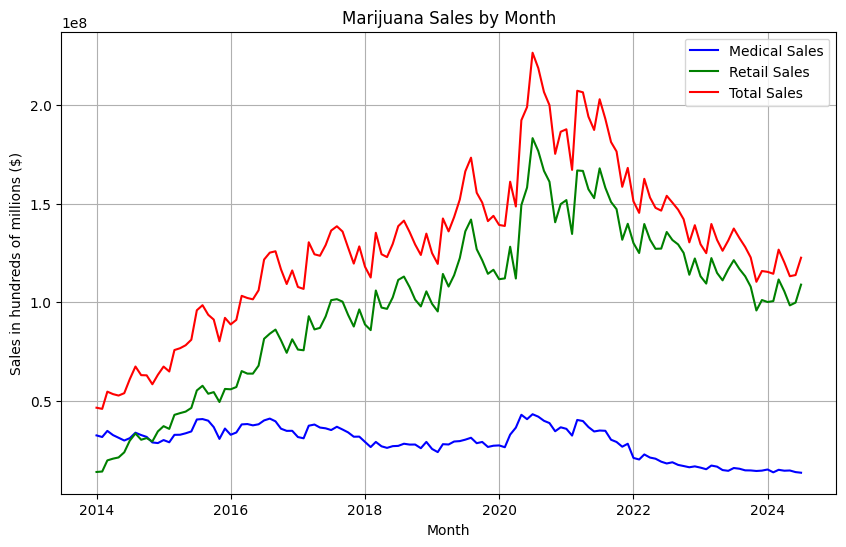

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total Medical Marijuana Sales'], color='blue', label='Medical Sales')
plt.plot(df.index, df['Total Retail Marijuana Sales'], color='green', label='Retail Sales')
plt.plot(df.index, df['Total Marijuana Sales'], color='red', label='Total Sales')
plt.title("Marijuana Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales in hundreds of millions ($)")
plt.legend()
plt.grid(True)
plt.show()

## Step 4: Plot Line Graphs by Quarter

/var/folders/y7/rgrhl49d54770g___dv9bqnm0000gn/T/ipykernel_85765/3427146087.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q').sum()


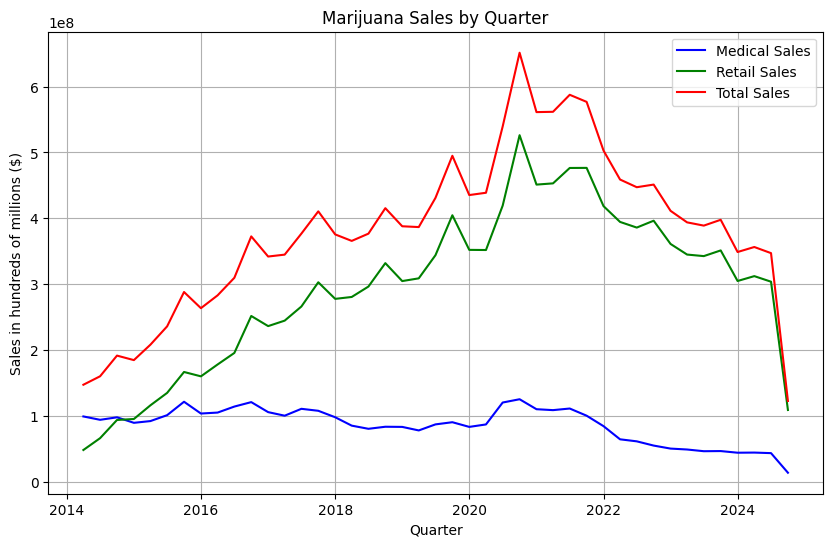

In [51]:
df_quarterly = df.resample('Q').sum()

plt.figure(figsize=(10, 6))
plt.plot(df_quarterly.index, df_quarterly['Total Medical Marijuana Sales'], color='blue', label='Medical Sales')
plt.plot(df_quarterly.index, df_quarterly['Total Retail Marijuana Sales'], color='green', label='Retail Sales')
plt.plot(df_quarterly.index, df_quarterly['Total Marijuana Sales'], color='red', label='Total Sales')
plt.title("Marijuana Sales by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Sales in hundreds of millions ($)")
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Plot Line Graphs by Year

/var/folders/y7/rgrhl49d54770g___dv9bqnm0000gn/T/ipykernel_85765/3762810437.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').sum()


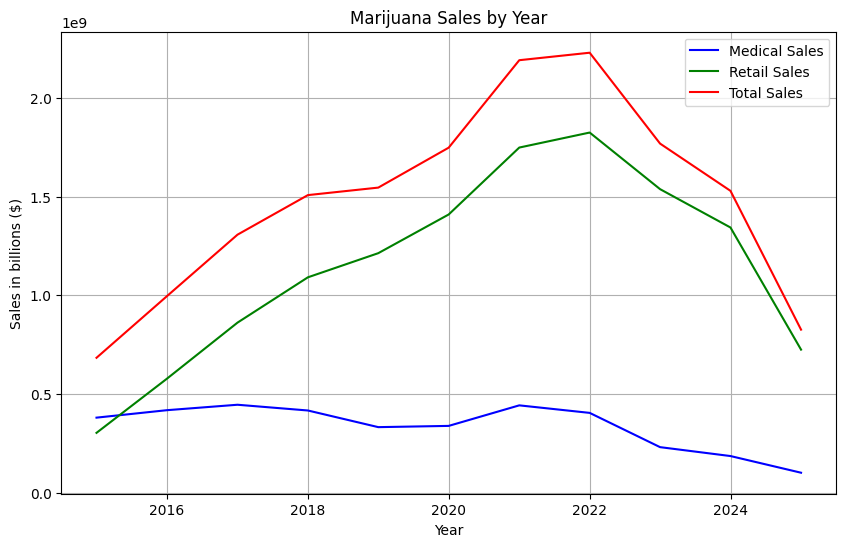

In [52]:
df_yearly = df.resample('Y').sum()

plt.figure(figsize=(10, 6))
plt.plot(df_yearly.index, df_yearly['Total Medical Marijuana Sales'], color='blue', label='Medical Sales')
plt.plot(df_yearly.index, df_yearly['Total Retail Marijuana Sales'], color='green', label='Retail Sales')
plt.plot(df_yearly.index, df_yearly['Total Marijuana Sales'], color='red', label='Total Sales')
plt.title("Marijuana Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales in billions ($)")
plt.legend()
plt.grid(True)
plt.show()